# The Euler method and how it can be refined

#### Second practical work, Monday,  October 5, 2020
In this second practical work, we introduce the *Euler method*. It is the most famous and simple numerical procedure for solving ordinary differential equations. We compare it to another numerical scheme, the so-called *midpoint method*, a little bit more tricky to implement but usually way more efficient. First, run the following cells to import the librairies used in this Notebook.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1: computing the exponential function

We wish to numerically solve the following ordinary differential equation (ode), 

$$\frac{\mathrm{d} y}{\mathrm{d}t} = y(t),~~~~~~~y(0)=1,$$

for t ∈ [0, t<sub>max</sub>] with t<sub>max</sub>=10. In that case, we conveniently know the exact solution of this problem, y(t)=e<sup>t</sup>. To proceed, this ode is discretized in time with a timestep ∆t. In other words, we shall numerically compute the values y<sub>n</sub> of y(t) only at some specific values of t, denoted by t<sub>n</sub> = n ∆t. We compare two ways of computing the y<sub>n</sub>.

**The Euler method**. Starting with

$$\frac{\mathrm{d} y}{\mathrm{d}t}(t) \simeq \frac{y(t+\Delta t) - y(t)}{\Delta t} = \frac{y_{n+1}-y_n}{\Delta t}, $$

we get

$$ \frac{y_{n+1}-y_n}{\Delta t} \simeq y_n \Longrightarrow \boxed{y_{n+1} \simeq y_n (1+\Delta t)}$$

**The explicit midpoint method**. With the more accurate estimate

$$\frac{\mathrm{d} y}{\mathrm{d}t}\left( t + \frac{\Delta t}{2}\right) \simeq \frac{y(t+\Delta t) - y(t)}{\Delta t} = \frac{y_{n+1}-y_n}{\Delta t}, $$

we get

$$ \frac{y_{n+1}-y_n}{\Delta t}   \simeq  \frac{\mathrm{d} y}{\mathrm{d}t}\left( t + \frac{\Delta t}{2}\right) = y \left( t + \frac{\Delta t}{2}\right) \simeq y(t) + \frac{\Delta t}{2}  \frac{\mathrm{d} y}{\mathrm{d}t}(t) = y(t) + \frac{\Delta t}{2} y(t) = y_n +\frac{\Delta t}{2} y_n \Longrightarrow \boxed{y_{n+1} \simeq y_n \left(1+ \Delta t + \frac{(\Delta t)^2}{2} \right)} $$

Insert new cells below to answer the following questions.

1. Define a function `euler_step(Y_old,dt)` returning y<sub>n+1</sub> given y<sub>n</sub> and ∆t with the Euler method
2. Similarly, define `mp_step(Y_old,dt)` associated with the explicit midpoint method
3. Write a function `euler(dt,t_max)` that returns two arrays filled with the values of t<sub>n</sub> and y<sub>n</sub> computed with the Euler method
4. Similarly, define `mp(dt,t_max)`
5. On a same graph, plot the exact solution of the ode and the numerical estimates based on the Euler and explicit midpoint methods for ∆t=0.25
6. We investigate the numerical error at the end of the simulation, 
$\varepsilon = \vert  y_\mathrm{N} - e^{t_N} \vert.$
   Compute this quantity for both methods and for ∆t ∈ [10<sup>-3</sup>,10<sup>-2</sup>,10<sup>-1</sup>], then plot them versus ∆t on a single log-log graph.
   *(Hint : use `plt.yscale('log')` to get a logarithmic scale on the y-axis)*
7. Show that one of these errors scales as ∆t, whereas the other scales as ∆t<sup>2</sup>. 


In [4]:
# Q1
def euler_step(Y_old, dt):
    return Y_old+dt*Y_old

# Q2
def mp_step(Y_old, dt):
    return Y_old*(1 + dt + 0.5*dt**2)

In [5]:
# Q3

def euler(dt, t_max):
    
    # Initialization 
    Y = 1
    t = 0.
    
    # Defining array
    t_arr = np.array([t])
    Y_arr = np.array([Y])
    
    while t < t_max:
        t += dt
        Y = euler_step(Y, dt)
        t_arr = np.append(t_arr, t)
        Y_arr = np.append(Y_arr, Y)
    
    return (t_arr, Y_arr)


# Q4
def mp(dt, t_max):
    
    # Initialization
    Y = 1
    t = 0
    
    # Defining array
    t_arr = np.array([t])
    Y_arr = np.array([Y])
    
    while t < t_max:
        t += dt
        Y = mp_step(Y, dt)
        t_arr = np.append(t_arr, t)
        Y_arr = np.append(Y_arr, Y)
        
    return (t_arr, Y_arr)

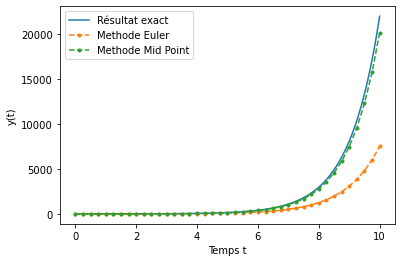

In [6]:
# Q5
dt = .25
t_max = 10

t_th = np.linspace(0, t_max, 100)
Y_th = np.exp(t_th)
plt.plot(t_th, Y_th, label='Résultat exact')

(t_num, Y_num) = euler(dt, t_max)
plt.plot(t_num, Y_num, '--.', label='Methode Euler')

(t_num, Y_num) = mp(dt, t_max)
plt.plot(t_num, Y_num, '--.', label='Methode Mid Point')
plt.legend()
plt.xlabel('Temps t')
plt.ylabel('y(t)')
#plt.yscale('log')
plt.show()

In [5]:
t_num

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

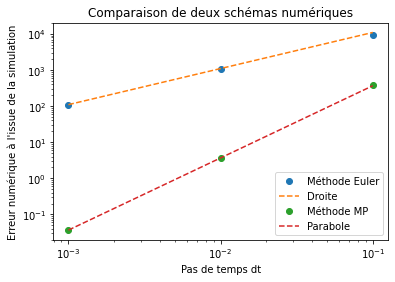

In [6]:
#Q6, Q7
N = 3
t_max = 10
Y0 = 1

dt_arr = np.logspace(-N, -1, N)
err_mp = np.empty(N)
err_euler = np.empty(N)

for n in range(N):
    (t_num, Y_num) = mp(dt_arr[n], t_max)
    err_mp[n] = np.abs(Y_num[-1]-np.exp(t_num[-1]))
    (t_num, Y_num) = euler(dt_arr[n], t_max)
    err_euler[n] = np.abs(Y_num[-1]-Y0*np.exp(t_num[-1]))

plt.plot(dt_arr, err_euler, 'o', label="Méthode Euler")
plt.plot(dt_arr, dt_arr*err_euler[0]/dt_arr[0], '--', label='Droite')
plt.plot(dt_arr, err_mp, 'o', label="Méthode MP")
plt.plot(dt_arr, dt_arr**2*err_mp[0]/dt_arr[0]**2, '--', label='Parabole')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Pas de temps dt')
plt.legend()
plt.ylabel('Erreur numérique à l\'issue de la simulation')
plt.title('Comparaison de deux schémas numériques')
plt.show()

In [7]:
print(dt_arr,err_euler,err_mp)

[0.001 0.01  0.1  ] [ 109.90525709 1079.08826212 9184.3358506 ] [3.67236039e-02 3.68364929e+00 3.77311545e+02]


### Second test: the Euler method in mechanics

Create a new Jupyter Notebook and save it as *firstname_lastname_TEST2.ipynb*. In this notebook, write a title and  answer the following questions.

**This .ipynb file will have to be uploaded on Moodle by Sunday, October 3 2021 at 8:00pm**

**It will be rated out of 10 (this course unit being rated out of 100)**

We consider the angle θ(t) of a pendulum subject to the following dynamics

$$\frac{\mathrm{d}^2 \theta}{\mathrm{d}t^2} + \omega_0^2 \sin(\theta) = 0, ~~~~ \theta(0) = \theta_0, ~~~~ \frac{\mathrm{d} \theta}{\mathrm{d}t}(0)=0.  $$

We want to numerically compute the solution of this second order differential equation with the Euler method, but this method deals with *first order* differential equations only. Thus, we turn the previous ode to a first order one by introducing the angular velocity Ω(t) as a new variable,

$$ \frac{\mathrm{d} \Omega}{\mathrm{d}t} + \omega_0^2\sin (\theta)=0, ~~~~~~~~  \Omega(t)=\frac{\mathrm{d} \theta}{\mathrm{d}t}, ~~~\theta(0) = \theta_0, ~~~~ \Omega(0)=0.$$


1. In a Markdown cell, write down θ<sub>n+1</sub> and Ω<sub>n+1</sub> as a function of θ<sub>n</sub>, Ω<sub>n</sub>, ∆t and ω<sub>0</sub>.

2. Write a function `euler_step(TH_old, OM_old, dt, omega0)` returning θ<sub>n+1</sub> and Ω<sub>n+1</sub> given θ<sub>n</sub>, Ω<sub>n</sub>, ∆t and ω<sub>0</sub>.

3.  Write a function `euler(TH_0, omega0, dt, t_max)` that returns three arrays filled with the values of t<sub>n</sub>, θ<sub>n</sub> and Ω<sub>n</sub> computed with the Euler method, given θ<sub>0</sub>, ω<sub>0</sub>, ∆t and t<sub>max</sub>.

4. For θ<sub>0</sub>=0.1, ω<sub>0</sub>=1, ∆t=0.1 and t<sub>max</sub>=100, plot θ(t) computed with the Euler method as a function of t. Add suitable axes name, legend, and title. What do you observe ? Does this change if ∆t is set to 0.01 ? For this problem, the Euler method is found to be *unconditionally unstable*.

5. We now turn to the explicit midpoint method, whose numerical scheme is given by
$$\theta_{n+1} = \theta_n + \Delta t \Omega_n - \frac{(\omega_0 \Delta t)^2}{2} \sin(\theta_n),~~~~~~~ \Omega_{n+1} = \Omega_n - \omega_0^2 \Delta t \sin \left( \theta_n + \frac{\Delta t \Omega_n}{2}\right).$$

   Similarly, define `mp_step(TH_old, OM_old, dt, omega0)` and `mp(TH_0, omega0, dt, t_max)`, then redo the plots of question 4 with this new scheme: what do you observe ?
5. We investigate the frequency of θ(t) computed with the midpoint method, θ<sub>0</sub>=.1, ω<sub>0</sub>=1, ∆t=0.1 and t<sub>max</sub>=100.

    1. Import the scipy library using `import scipy.signal as spsig` then compute the power spectral density with `spsig.welch(x,fs, nperseg=len(x))` [(read the Scipy documentation for this function to know what should x and fs be given by)](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html)
    2. Plot the power spectral density for frequencies between zero and 0.2Hz with circlular markers.
    3. How would you estimate the frequency f(θ<sub>0</sub>) of the signal ? and the uncertainty df(θ<sub>0</sub>) on that measure ?
6. 
    1. Extract from this figure f(θ<sub>0</sub>) and df(θ<sub>0</sub>).
    *(Hint : you may use the functions `np.max` and `np.argmax`)*
    2. Plot f(θ<sub>0</sub>) for twenty values θ<sub>0</sub> between 0.1 and 3. with error bars (use `plt.errorbar`). Add to this graph the theoretical prediction for small but finite θ<sub>0</sub>, 
    $$f(\theta_0) = \frac{\omega_0}{2\pi}\left( 1 - \frac{\theta_0^2}{16}\right) $$

**Correction**


Q1. Pour la méthode d'Euler, on a naïvement
$$\theta_{n+1} = \theta_n + \Delta t \Omega_n,~~~~~~ \Omega_{n+1} = \Omega_n - \Delta t \omega_0^2 \sin(\theta_n), $$
qui se trouve être inconditionnellement instable !

In [8]:
def euler_step_1(TH_old,OM_old,dt,omega0):
    TH_new = TH_old+OM_old*dt
    OM_new = OM_old-omega0*omega0*np.sin(TH_old)*dt
    return [TH_new,OM_new]

def euler_1(TH_0,omega0,dt,t_max):
    n  = int(t_max/dt)
    tn = np.arange(0,n+1)*dt
    th_n = np.zeros(n+1)
    th_n[0] = TH_0
    om_n = np.zeros(n+1)
    om_n[0] = 0
    for i in range(0,n):
        th_n[i+1],om_n[i+1] = euler_step(th_n[i],om_n[i],dt,omega0)
    return [tn,th_n,om_n]

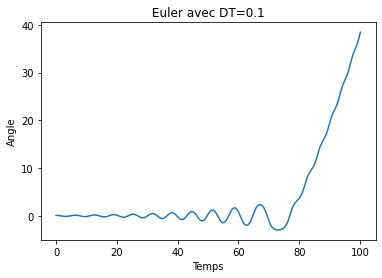

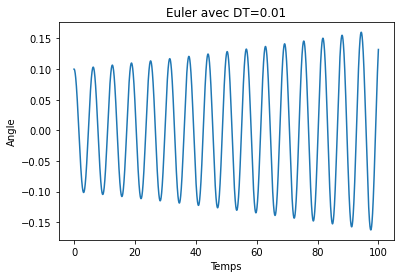

In [15]:
# Q2
def euler_step(TH_old, OM_old, dt, omega0):
    return (TH_old+dt*OM_old, OM_old-dt*omega0**2*np.sin(TH_old))

# Q3
def euler(TH_0, omega0, dt, t_max):
    TH = TH_0
    OM = 0.
    t = 0.
    t_arr = np.array([t])
    TH_arr = np.array([TH])
    OM_arr = np.array([OM])
    while t < t_max:
        t += dt
        (TH, OM) = euler_step(TH, OM, dt, omega0)
        t_arr = np.append(t_arr, t)
        TH_arr = np.append(TH_arr, TH)
        OM_arr = np.append(OM_arr, OM)
    return (t_arr, TH_arr, OM_arr)


# Q4
dt = .1
t_max = 100
TH_0 = 0.1
omega0 = 1
(t_num, TH_num, OM_num) = euler(TH_0, omega0, dt, t_max)
plt.plot(t_num, TH_num, '-', label='Methode Euler')
plt.xlabel('Temps')
plt.ylabel('Angle')
plt.title('Euler avec DT=0.1')
plt.show()

dt = .01
(t_num, TH_num, OM_num) = euler(TH_0, omega0, dt, t_max)
plt.plot(t_num, TH_num, '-', label='Methode Euler')
plt.xlabel('Temps')
plt.ylabel('Angle')
plt.title('Euler avec DT=0.01')
plt.show()

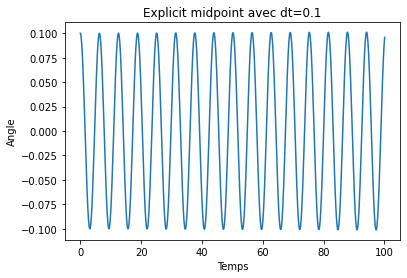

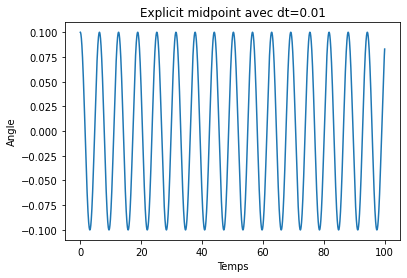

In [16]:
#Q5
def md_step(TH_old,OM_old,dt,omega0):
    return (TH_old+dt*OM_old-dt**2*.5*omega0**2*np.sin(TH_old), OM_old-dt*omega0**2*np.sin(TH_old+.5*dt*OM_old))

def md(TH_0,omega0,dt,t_max):
    TH=TH_0
    OM=0.
    t=0.  
    t_arr= np.array([t])
    TH_arr= np.array([TH])
    OM_arr= np.array([OM])
    while t<t_max:
        t += dt
        (TH,OM) = md_step(TH,OM,dt,omega0)
        t_arr = np.append(t_arr, t)
        TH_arr = np.append(TH_arr, TH)
        OM_arr = np.append(OM_arr, OM)
    return (t_arr, TH_arr, OM_arr)

dt=.1
t_max=100
TH_0=0.1
omega0=1
(t_num,TH_num,OM_num)=md(TH_0,omega0,dt,t_max)
plt.plot(t_num,TH_num,'-')
plt.xlabel('Temps')
plt.ylabel('Angle')
plt.title('Explicit midpoint avec dt=0.1')
plt.show()

dt=.01
(t_num,TH_num,OM_num)=md(TH_0,omega0,dt,t_max)
plt.plot(t_num,TH_num,'-')
plt.xlabel('Temps')
plt.ylabel('Angle')
plt.title('Explicit midpoint avec dt=0.01')
plt.show()

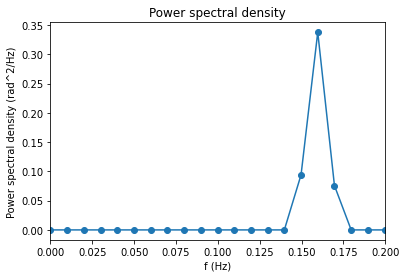

In [17]:
#Q6
import scipy.signal as spsig

dt=.1
t_max=100
TH_0=.1
omega0=1
(t_num,TH_num,OM_num)=md(TH_0,omega0,dt,t_max)

x=TH_num
fs=1/dt

(f, Pxx)= spsig.welch(x,fs, nperseg=len(x)) #estimate power spectral density using Welch’s method.
plt.plot(f,Pxx, 'o-')
plt.title("Power spectral density")
plt.xlabel("f (Hz)")
plt.ylabel("Power spectral density (rad^2/Hz)")
plt.xlim(0,.2)
plt.show()

On prend comme fréquence celle correspondant au maximum du spectre. Pour l'incertitude, on peut prendre l'écart entre deux points en fréquence, éventuellement pondéré par le nombre de points tels que le spectre est au-dessus de la moitié de sa valeur maximale

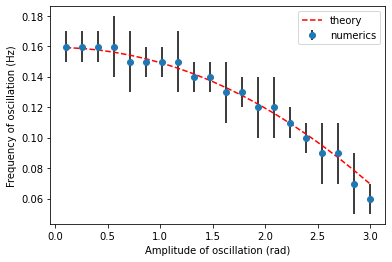

In [18]:
#Q7


def freq_error(TH_num, dt):

    fs = 1 / dt
    x = TH_num
    (f, Pxx) = spsig.welch(x, fs, nperseg=len(x))  #estimate power spectral density using Welch’s method.
    fmax = f[np.argmax(Pxx)]
    Pxxmax = np.max(Pxx)

    df = 0.
    for n in range(len(f)):
        if Pxx[n] > Pxxmax * .5: df += f[1] - f[0]
    return (fmax, df)


omega0 = 1.
dt = .1
t_max = 100.
N = 20
TH_0_arr = np.linspace(.1, 3, N)
fmax_arr = np.empty(N)
df_arr = np.empty(N)
for i in range(N):
    (t_num, TH_num, OM_num) = md(TH_0_arr[i], omega0, dt, t_max)
    (fmax_arr[i], df_arr[i]) = freq_error(TH_num, dt)

fmax_theory = omega0 / (2 * np.pi) * (1 - TH_0_arr**2 / 16)
plt.plot(TH_0_arr, fmax_theory, '--r', label='theory')
plt.errorbar(TH_0_arr,
             fmax_arr,
             df_arr,
             marker='o',
             ecolor='black',
             linestyle='none',
             label="numerics")
plt.legend()
plt.xlabel("Amplitude of oscillation (rad)")
plt.ylabel("Frequency of oscillation (Hz)")
plt.show()